In [9]:
%matplotlib inline

In [10]:
import pandas

In [11]:
df_rulebook = pandas.read_csv('../results/rulebook20240109103612.csv')
df_rulebook_parallel = pandas.read_csv('../results/parallel_rulebook20240109110308.csv')
df_playbook = pandas.read_csv('../results/playbook20240109103840.csv')
df = pandas.concat([df_rulebook, df_rulebook_parallel, df_playbook])
#df

In [12]:
df2 = df.pivot(index="n", columns="name", values="time")
#df2

<Axes: title={'center': 'Local Module Execution Duration (larger is worse)'}, xlabel='num hosts', ylabel='time in seconds'>

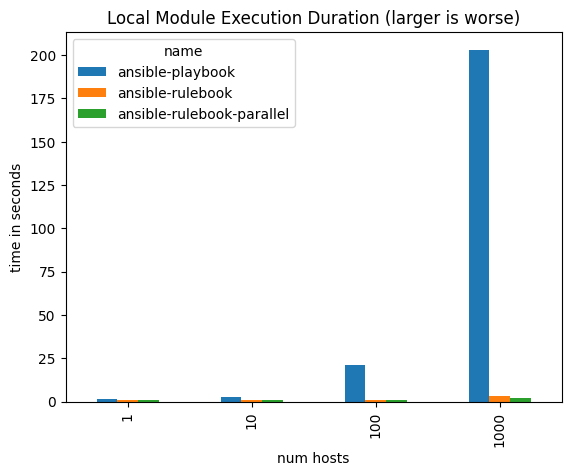

In [17]:
df2.plot.bar(title="Local Module Execution Duration (larger is worse)", ylabel="time in seconds", xlabel="num hosts")


In [16]:
rulebook_speedup = df2['ansible-playbook'] / df2['ansible-rulebook']
rulebook_speedup = pandas.DataFrame(rulebook_speedup, columns=['rulebook_speedup'])
#rulebook_speedup

rulebook_parallel_speedup = df2['ansible-playbook'] / df2['ansible-rulebook-parallel']
rulebook_parallel_speedup = pandas.DataFrame(rulebook_parallel_speedup, columns=['rulebook_parallel_speedup'])
#ftl_async_speedup

df_speedup = pandas.concat([rulebook_speedup, rulebook_parallel_speedup], axis=1)
df_speedup

,rulebook_speedup,rulebook_parallel_speedup
n,,
1,1.199081,1.332550
10,2.647078,2.956273
100,18.127205,19.930640
1000,66.107636,98.849811


<Axes: title={'center': 'Rulebook speedup (larger is better)'}, xlabel='num tasks', ylabel='speedup'>

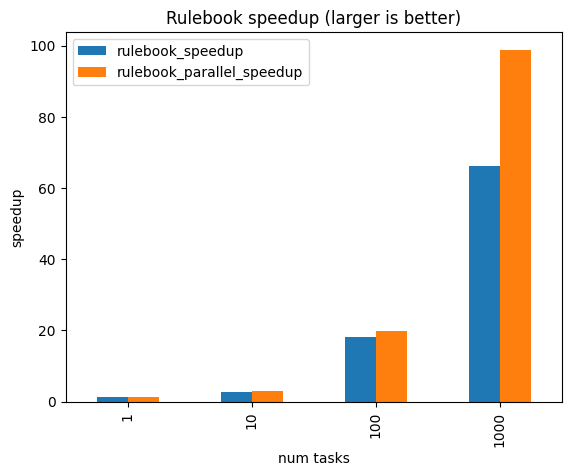

In [18]:
df_speedup.plot.bar(title="Rulebook speedup (larger is better)", xlabel="num tasks", ylabel="speedup")